In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from data_loader import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(402, 64, 64, 3)
(402, 1)
(40, 64, 64, 3)
(40, 1)


In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(402, 12288)

In [5]:
cat_model = Sequential()
cat_model.add(Dense(128, activation='relu', input_shape=(12288,)))
cat_model.add(Dense(64, activation='relu'))
cat_model.add(Dense(32, activation='relu'))
cat_model.add(Dense(16, activation='relu'))
cat_model.add(Dense(1, activation='sigmoid'))

In [6]:
cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,583,873
Trainable params: 1,583,873
Non-trainable params: 0
_________________________________________________________________


In [7]:
cat_model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
cat_model.fit(x_train, y_train,epochs=40 ,validation_data=(x_test, y_test))

Train on 402 samples, validate on 40 samples
Epoch 1/40
402/402 [==============================] - 2s 6ms/step - loss: 0.6967 - acc: 0.4577 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 2/40
402/402 [==============================] - 0s 529us/step - loss: 0.6910 - acc: 0.5299 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 3/40
402/402 [==============================] - 0s 509us/step - loss: 0.6865 - acc: 0.5896 - val_loss: 0.7006 - val_acc: 0.4250
Epoch 4/40
402/402 [==============================] - 0s 540us/step - loss: 0.6846 - acc: 0.5945 - val_loss: 0.7004 - val_acc: 0.4250
Epoch 5/40
402/402 [==============================] - 0s 494us/step - loss: 0.6817 - acc: 0.5498 - val_loss: 0.6946 - val_acc: 0.5000
Epoch 6/40
402/402 [==============================] - 0s 567us/step - loss: 0.6776 - acc: 0.6294 - val_loss: 0.7063 - val_acc: 0.5250
Epoch 7/40
402/402 [==============================] - 0s 531us/step - loss: 0.6751 - acc: 0.6368 - val_loss: 0.6966 - val_acc: 0.5750
Epoch 8/40
402/402 

e:\code_env\python\env\tf\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
e:\code_env\python\env\tf\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


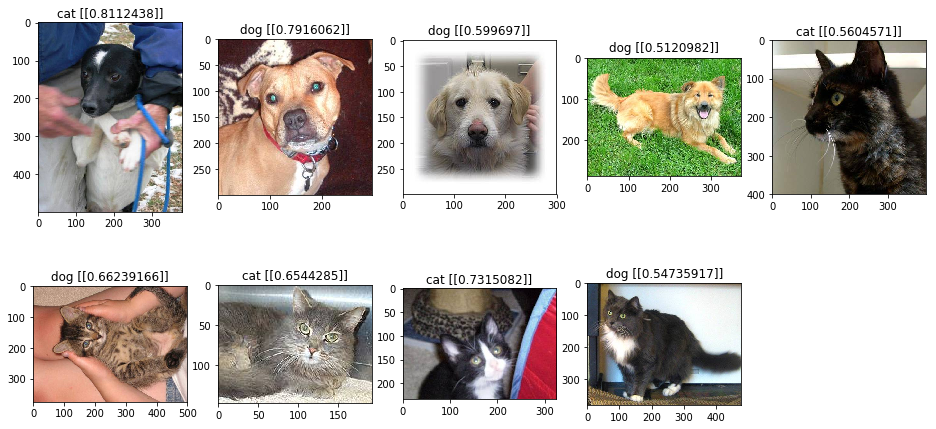

40/40 [==============================] - 0s 974us/step


[0.7525256156921387, 0.525]

In [9]:
from skimage.transform import resize
fig=plt.figure(figsize=(16, 16))
for i in range(1, 10):
    my_image =  'images/test/{}.jpg'.format(i)
    my_image = np.array(plt.imread(my_image))
    ax = fig.add_subplot(4, 5, i)
    plt.imshow(my_image)
    num_px = 64
    my_image = resize(my_image, (num_px, num_px))
    my_image.shape
    my_image = my_image.reshape(1, -1)
    a = cat_model.predict(my_image)
    if  a > 0.5:
        ax.title.set_text('cat {}'.format(a))
    else:
        ax.title.set_text('dog {}'.format(1 - a))
    
plt.show()
cat_model.evaluate(x_test, y_test)